<a href="https://colab.research.google.com/github/VictorAugustoCorrea/Deep-learning-course/blob/main/Deep_learning_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports and load data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22
url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'

passenger = pd.read_csv(url)
passenger.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

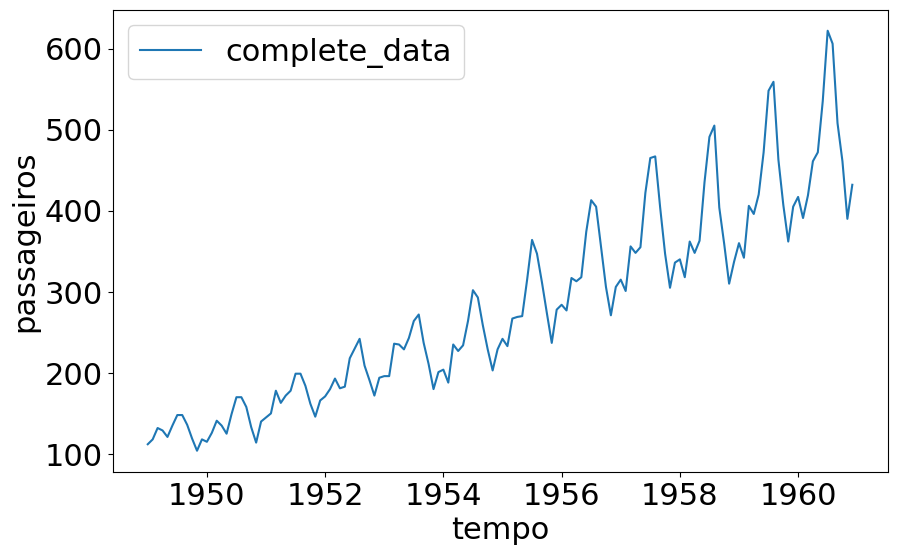

In [2]:
#Data visualization
sns.lineplot(x='tempo', y='passageiros', data=passenger, label='complete_data')

Text(0.5, 0, 'date/time')

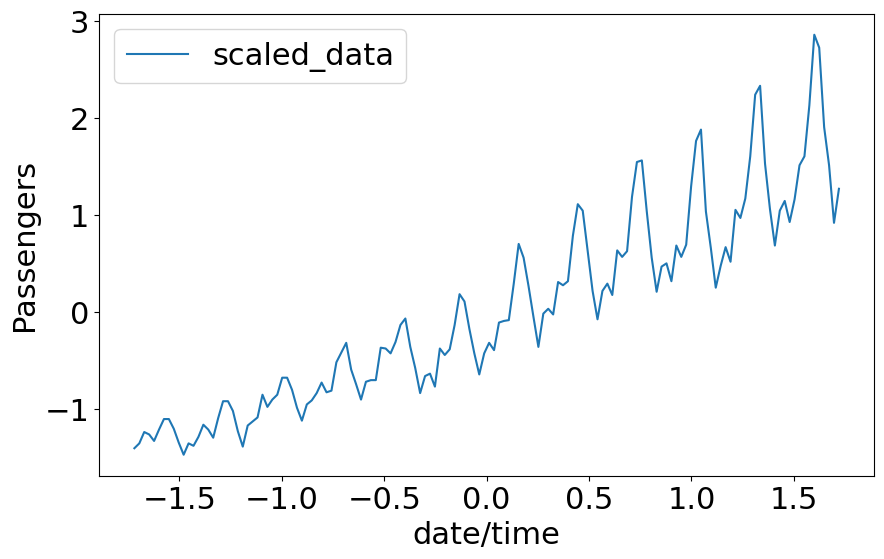

In [3]:
#Scaled data and broke size
sc = StandardScaler()
passenger_scaled = sc.fit_transform(passenger)

x = passenger_scaled[: ,0]
y = passenger_scaled[: ,1]

sns.lineplot(x=x, y=y, label='scaled_data')
mpl.ylabel('Passengers')
mpl.xlabel('date/time')

In [4]:
#Divide data
size_training = int(len(passenger_scaled) * 0.9)
size_testing  = len(passenger_scaled) - size_training

In [5]:
#Create data input for the model
xTraining = x[0: size_training]
yTraining = y[0: size_training]

xTest = x[size_training: len(passenger_scaled)]
yTest = y[size_training: len(passenger_scaled)]

Text(0.5, 0, 'date/time')

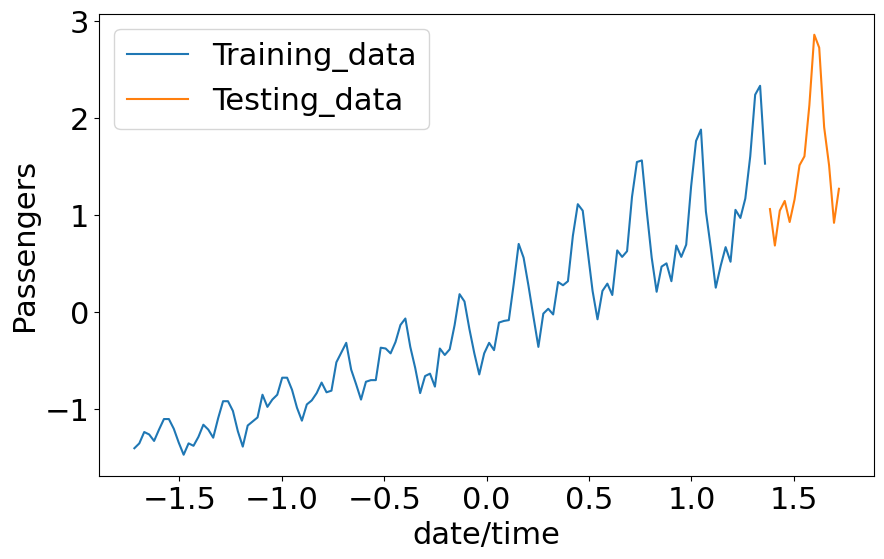

In [6]:
sns.lineplot(x=xTraining, y=yTraining, label='Training_data')
sns.lineplot(x=xTest, y=yTest, label='Testing_data')
mpl.ylabel('Passengers')
mpl.xlabel('date/time')

In [7]:
#Neural Network
regressor = Sequential()
regressor.add(Dense(1, input_dim=1 ,kernel_initializer='Ones', activation='linear',use_bias=False))
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Training model
regressor.fit(xTraining, yTraining)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1263


In [9]:
#First predict
y_predict = regressor.predict(xTraining)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<Axes: >

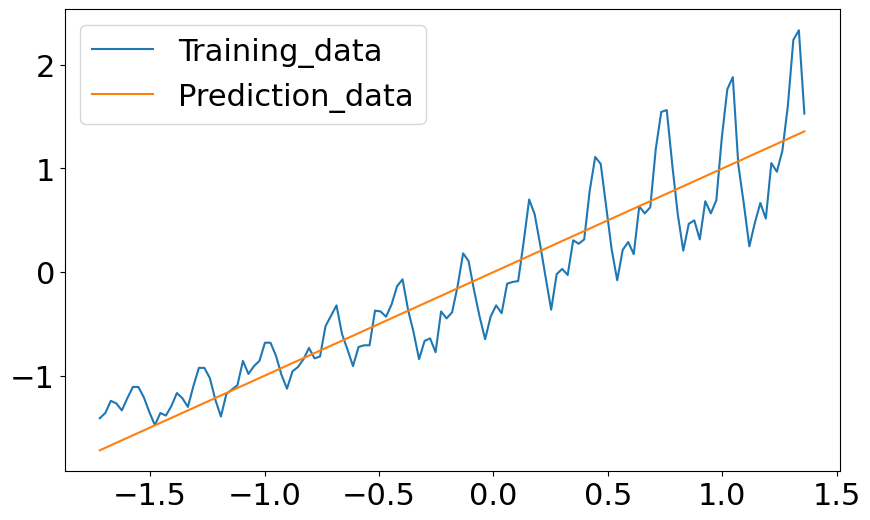

In [10]:
#Results visualization
sns.lineplot(x=xTraining, y=yTraining, label='Training_data')
sns.lineplot(x=xTraining, y=y_predict[:,0], label='Prediction_data')

In [11]:
#Transform results data
d = {'time': xTraining, 'passengers': y_predict[:,0]}
results = pd.DataFrame(data=d)
transformed_result = sc.inverse_transform(results)
transformed_result = pd.DataFrame(transformed_result, columns=['time', 'passengers'])

<Axes: xlabel='tempo', ylabel='passageiros'>

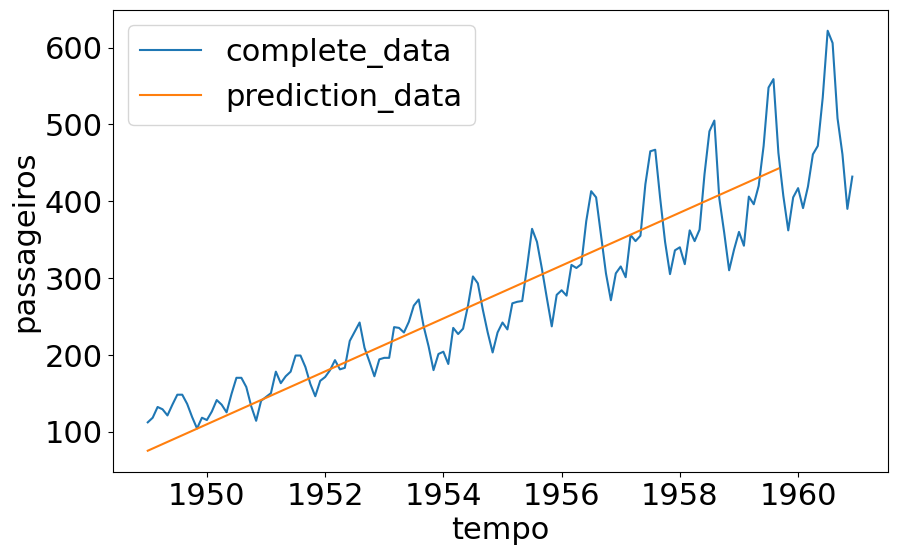

In [12]:
#Visualization
sns.lineplot(x='tempo', y='passageiros', data=passenger, label='complete_data')
sns.lineplot(x='time', y='passengers', data=transformed_result, label='prediction_data')

In [13]:
#New predict
y_predict_test = regressor.predict(xTest)
d = {'time': xTest, 'passengers': y_predict_test[:,0]}
results_test = pd.DataFrame(data=d)
transformed_results_test = sc.inverse_transform(results_test)
transformed_results_test = pd.DataFrame(transformed_results_test, columns=['time', 'passengers'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


<Axes: xlabel='tempo', ylabel='passageiros'>

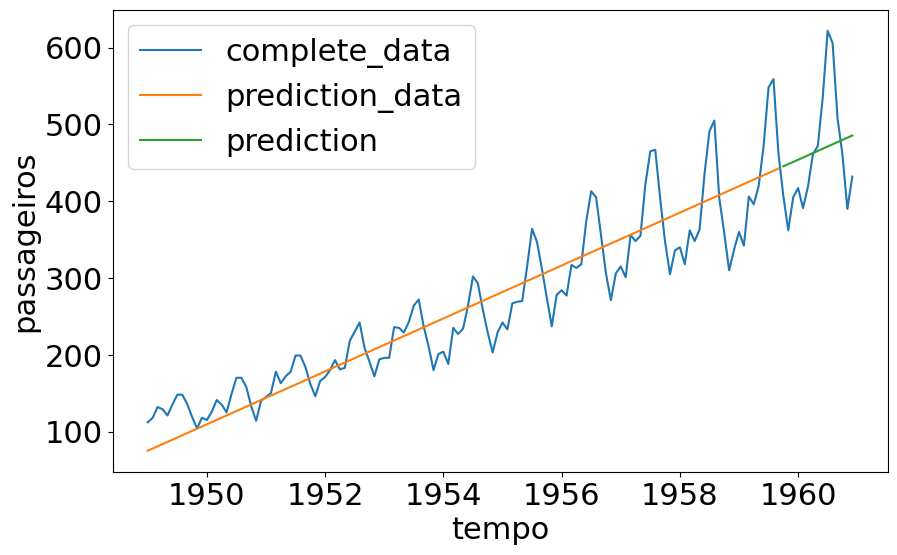

In [14]:
#Plot results
sns.lineplot(x='tempo', y='passageiros', data=passenger, label='complete_data')
sns.lineplot(x='time', y='passengers', data=transformed_result, label='prediction_data')
sns.lineplot(x='time', y='passengers', data=transformed_results_test, label='prediction')

In [15]:
# Add more layers
regressor_2 = Sequential()
regressor_2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

#compile
regressor_2.compile(loss='mean_squared_error', optimizer='adam')
regressor_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Training new model
regressor_2.fit(xTraining, yTraining, epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7638  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8282 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8331 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7979 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7200 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7657 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8570 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8153  
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7200  
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7538 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8513 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8080 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8206  
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7283 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8011 
Epoch 16/200
5/

In [17]:
#Predict new model
y_predict = regressor_2.predict(xTraining)
y_predict_test = regressor_2.predict(xTest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


<Axes: >

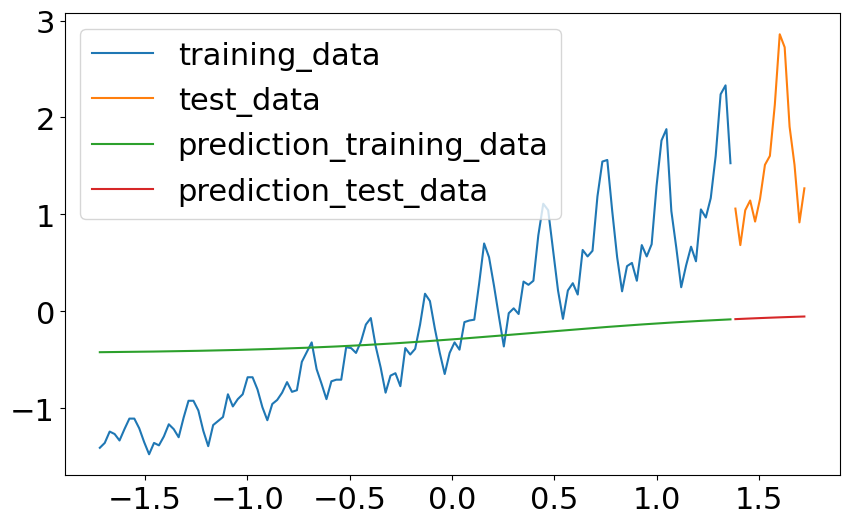

In [18]:
#Plot new model performance
sns.lineplot(x=xTraining, y=yTraining, label='training_data')
sns.lineplot(x=xTest, y=yTest, label='test_data')
sns.lineplot(x=xTraining, y=y_predict[:,0], label='prediction_training_data')
sns.lineplot(x=xTest, y=y_predict_test[:,0], label='prediction_test_data')

In [19]:
#Define vector
vector = pd.DataFrame(yTraining)[0]

#Function to predict next year numbers
def separe_datas(vector, n_steps):
  x_novo,y_novo = [], []

  for i in range(n_steps, vector.shape[0]):
    x_novo.append(list(vector.loc[i-n_steps:i-1]))
    y_novo.append(vector.loc[i])

  x_novo, y_novo = np.array(x_novo), np.array(y_novo)

  return x_novo, y_novo

In [20]:
xTraining_new, yTraining_new = separe_datas(vector, 1)

In [21]:
xTraining_new[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [22]:
yTraining_new[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [23]:
#Apply for tests also
vector_2 = pd.DataFrame(yTest)[0]
xTest_new, yTest_new = separe_datas(vector_2, 1)

In [24]:
#Third model to test
regressor_3 = Sequential()
regressor_3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor_3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor_3.compile(loss='mean_squared_error', optimizer='adam')

#training new model
regressor_3.fit(xTraining_new, yTraining_new, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7261 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7396
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7402
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6982
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7039
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6693 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5868 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6515
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5637
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5027
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5672
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5094
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4691
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4325
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3559
Epoch 16/100
4/4 ━━━━━━━━━━━

In [25]:
#Predict new model
y_predict_third = regressor_3.predict(xTraining_new)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


<Axes: xlabel='tempo'>

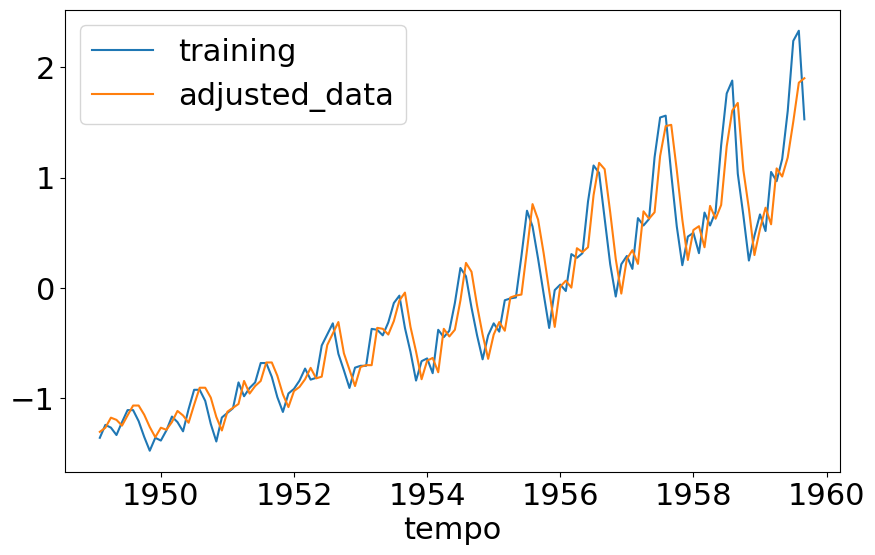

In [26]:
#Plot third model training
sns.lineplot(x='tempo', y=yTraining_new, data=passenger[1:129], label='training')
sns.lineplot(x='tempo', y=y_predict_third[:,0], data=passenger[1:129], label='adjusted_data')

In [27]:
#Predict test
y_predict_test_third = regressor_3.predict(xTest_new)
results_test_new = pd.DataFrame(y_predict_test_third)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


<Axes: xlabel='tempo'>

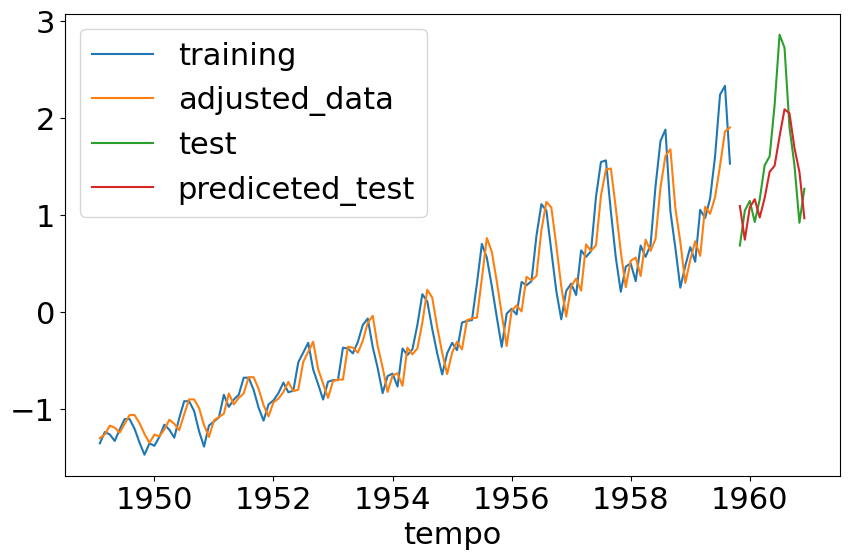

In [28]:
#Plot third model
sns.lineplot(x='tempo', y=yTraining_new, data=passenger[1:129], label='training')
sns.lineplot(x='tempo', y=y_predict_third[:,0], data=passenger[1:129], label='adjusted_data')
sns.lineplot(x='tempo', y=yTest_new, data=passenger[130:144], label='test')
sns.lineplot(x='tempo', y=results_test_new.values, data=passenger[130:144], label='prediceted_test')

In [29]:
xTraining_new, yTraining_new = separe_datas(vector, 4)

In [30]:
xTraining_new[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [31]:
yTraining_new[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [32]:
xTest_new, yTest_new = separe_datas(vector_2, 4)

In [33]:
#fourth  model to test
regressor_4 = Sequential()
regressor_4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor_4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor_4.compile(loss='mean_squared_error', optimizer='adam')

#training new model
regressor_4.fit(xTraining_new, yTraining_new, epochs=300)

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7961
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7187
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5834
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5260
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5014
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3909
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3385
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3341
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2468
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2036
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1732
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1618
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1392
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1248
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1370 
Epoch 16/300
4/4 ━━━━━━━━━━━━━

In [34]:
#Predict training and test fourth
y_predict_fourth = regressor_4.predict(xTraining_new)
y_predict_test_fourth = regressor_4.predict(xTest_new)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [35]:
#Results fourth model
results_training_fourth = pd.DataFrame(y_predict_fourth)[0]
results_test_fourth = pd.DataFrame(y_predict_test_fourth)[0]

<Axes: xlabel='tempo', ylabel='0'>

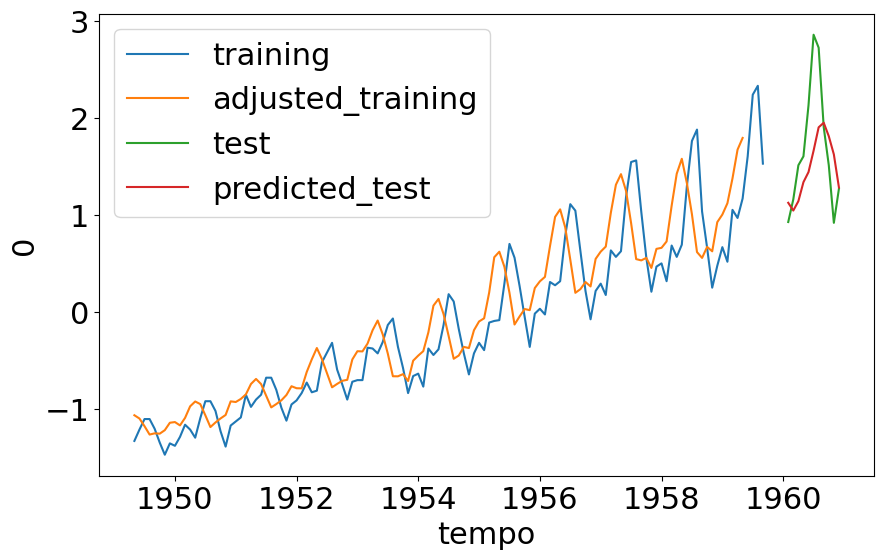

In [36]:
#Plot fourth model
sns.lineplot(x='tempo', y=yTraining_new, data=passenger[4:129], label='training')
sns.lineplot(x='tempo', y=results_training_fourth, data=passenger[4:129], label='adjusted_training')
sns.lineplot(x='tempo', y=yTest_new, data=passenger[133:144], label='test')
sns.lineplot(x='tempo', y=results_test_fourth.values, data=passenger[133:144], label='predicted_test')

In [37]:
new_url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'
new_datas = pd.read_csv(new_url)
new_datas.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [38]:
new_datas['datas'] = pd.to_datetime(new_datas['datas'])
new_datas.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

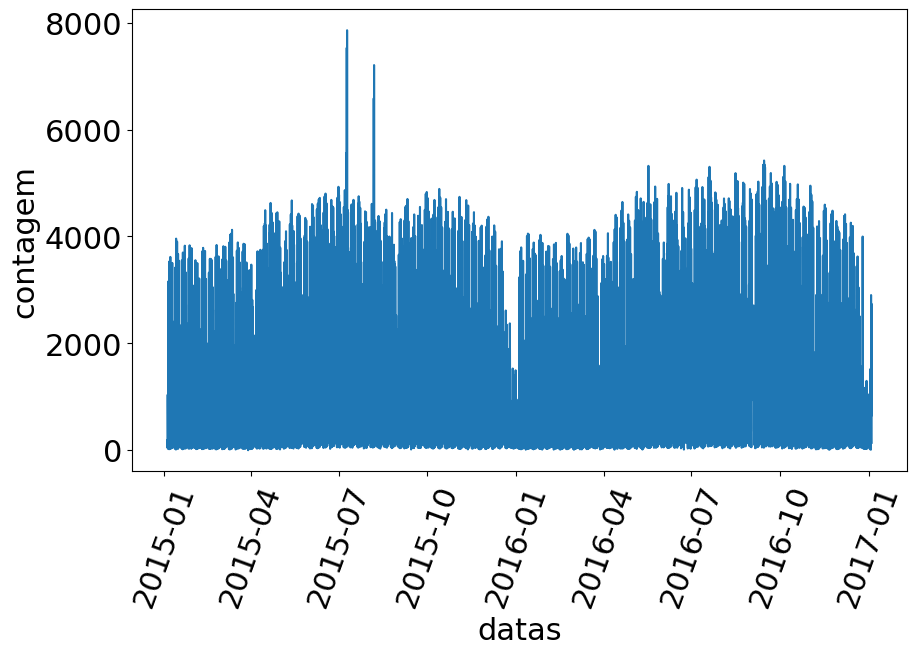

In [39]:
sns.lineplot(x='datas', y='contagem', data=new_datas)
mpl.xticks(rotation=70)

In [40]:
sc2 = StandardScaler()
sc2.fit(new_datas['contagem'].values.reshape(-1,1))

StandardScaler()

In [41]:
y = sc2.transform(new_datas['contagem'].values.reshape(-1,1))

In [42]:
size_training_new = int(len(new_datas) * 0.9)
size_testing_new = len(new_datas) - size_training_new
yTraining_new = y[0: size_training_new]
yTest_new = y[size_training_new: len(new_datas)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

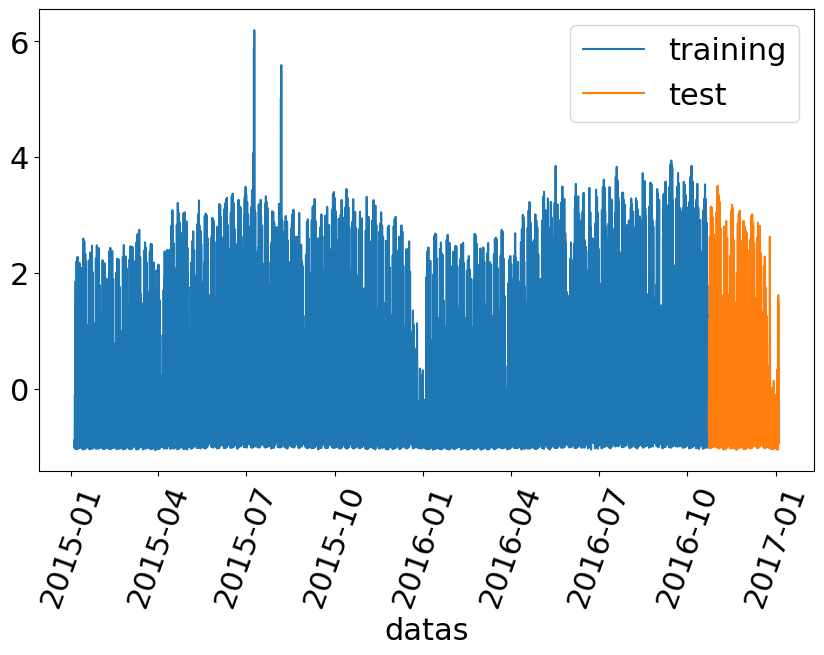

In [43]:
sns.lineplot(x='datas', y=yTraining_new[:,0], data=new_datas[0:size_training_new], label='training')
sns.lineplot(x='datas', y=yTest_new[:,0], data=new_datas[size_training_new:len(new_datas)], label='test')
mpl.xticks(rotation=70)

In [44]:
new_vector = pd.DataFrame(yTraining_new)[0]
new_vector_2 = pd.DataFrame(yTest_new)[0]
x_training_new, y_training_new = separe_datas(new_vector, 10)
x_test_new, y_test_new = separe_datas(new_vector_2, 10)

In [45]:
x_training_new = x_training_new.reshape((x_training_new.shape[0], x_training_new.shape[1], 1))
x_test_new = x_test_new.reshape((x_test_new.shape[0], x_test_new.shape[1], 1))

In [46]:
recurring_model = Sequential()

recurring_model.add(LSTM(128, input_shape=(x_training_new.shape[1], x_training_new.shape[2])))
recurring_model.add(Dense(units=1))

recurring_model.compile(loss='mean_squared_error', optimizer='RMSProp')
recurring_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
results = recurring_model.fit(x_training_new, y_training_new, validation_data=(x_test_new, y_test_new), epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.4745 - val_loss: 0.0971
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 0.0933 - val_loss: 0.0443
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0599 - val_loss: 0.0380
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 0.0469 - val_loss: 0.0408
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0409 - val_loss: 0.0254
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0430 - val_loss: 0.0378
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0383 - val_loss: 0.0300
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0340 - val_loss: 0.0214
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0338 - val_loss: 0.0387
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0330 - val_loss: 0.0216
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0327 - val_loss: 0.0210
Epoch 12/100
490/490

In [48]:
y_adjusted = recurring_model.predict(x_training_new)

490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

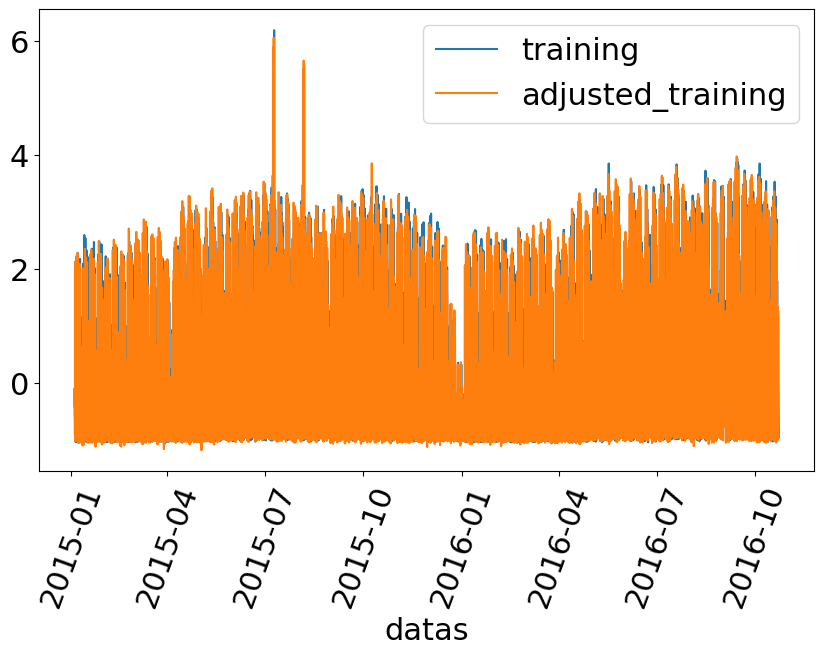

In [49]:
sns.lineplot(x='datas', y=y_training_new, data=new_datas[10:size_training_new], label='training')
sns.lineplot(x='datas', y=y_adjusted[:,0], data=new_datas[0:15662], label='adjusted_training')
mpl.xticks(rotation=70)

In [50]:
y_predict_new = recurring_model.predict(x_test_new)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

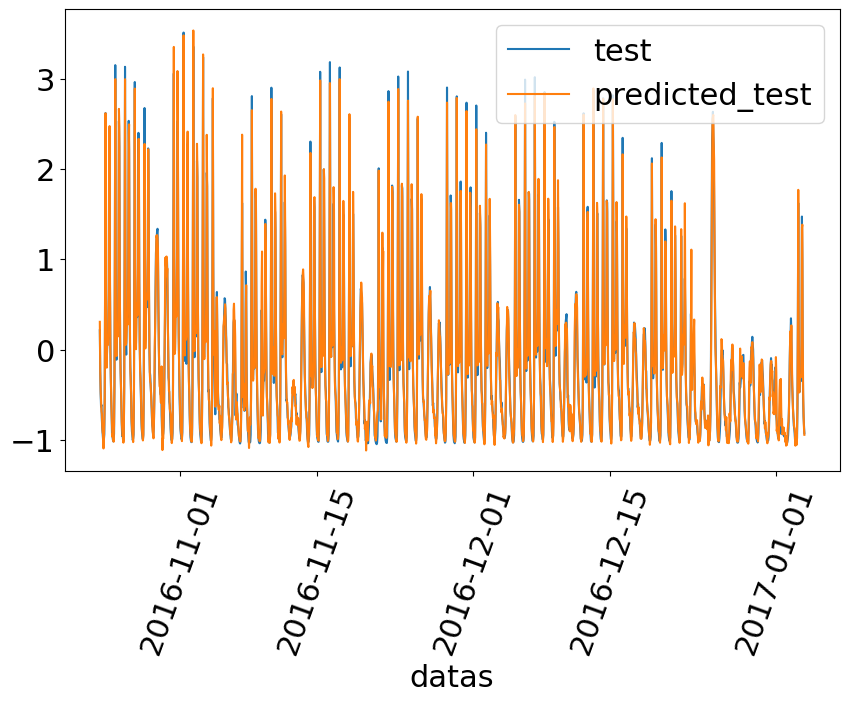

In [51]:
sns.lineplot(x='datas', y=y_test_new, data=new_datas[size_training_new + 10:len(new_datas)], label='test')
sns.lineplot(x='datas', y=y_predict_new[:,0], data=new_datas[size_training_new + 10: len(new_datas)], label='predicted_test')
mpl.xticks(rotation=70)

In [52]:
recurring_g = Sequential()

recurring_g.add(GRU(128, input_shape=(x_training_new.shape[1], x_training_new.shape[2])))
recurring_g.add(Dense(units=1))

recurring_g.compile(loss='mean_squared_error', optimizer='RMSProp')

recurring_g.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
result_2 = recurring_g.fit(x_training_new, y_training_new, validation_data=(x_test_new, y_test_new), epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.3933 - val_loss: 0.0623
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0792 - val_loss: 0.0543
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0588 - val_loss: 0.0279
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0442 - val_loss: 0.0250
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0435 - val_loss: 0.0324
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0380 - val_loss: 0.0499
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0355 - val_loss: 0.0215
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0387 - val_loss: 0.0229
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0366 - val_loss: 0.0199
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0359 - val_loss: 0.0210
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0349 - val_loss: 0.0281
Epoch 12/100
490/490 ━━━━

In [54]:
y_predict_training_2 = recurring_g.predict(x_training_new)
y_predict_test_2 = recurring_g.predict(x_test_new)

490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

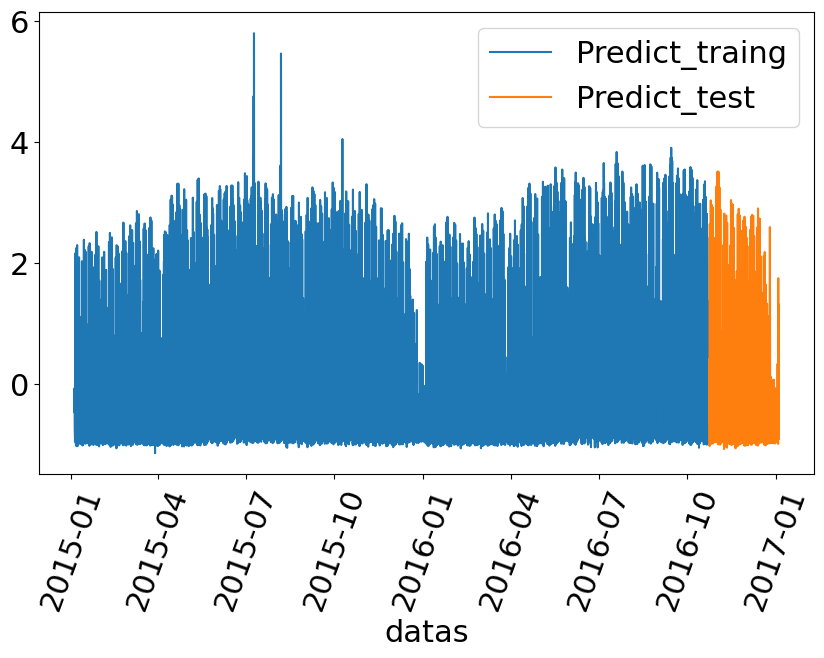

In [55]:
sns.lineplot(x='datas', y=y_predict_training_2[:,0], data=new_datas[10:size_training_new], label='Predict_traing') # Access the first (and only) column of the 2D array
sns.lineplot(x='datas', y=y_predict_test_2[:,0], data=new_datas[size_training_new + 10: len(new_datas)], label='Predict_test')
mpl.xticks(rotation=70)

Text(0, 0.5, 'Costs')

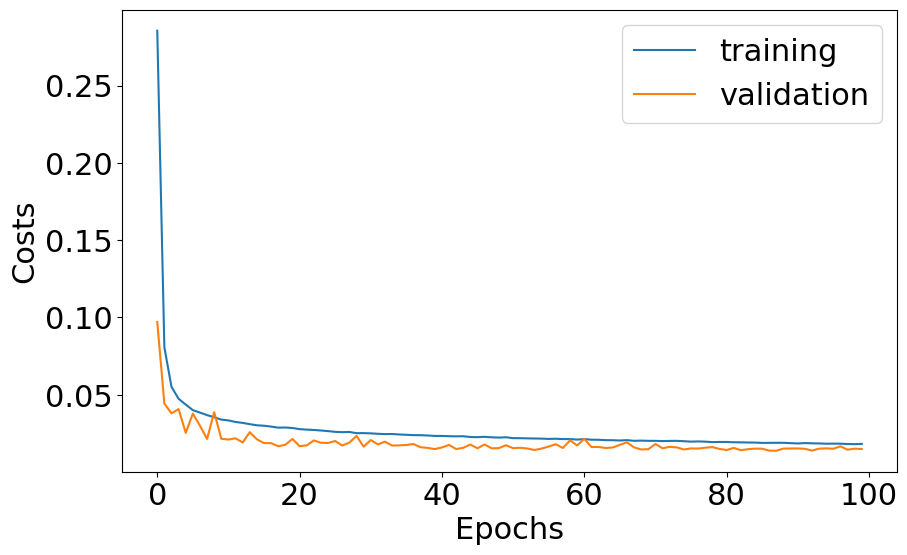

In [56]:
mpl.plot(results.history['loss'])
mpl.plot(results.history['val_loss'])
mpl.legend(['training', 'validation'])
mpl.xlabel('Epochs')
mpl.ylabel('Costs')

Text(0, 0.5, 'Costs')

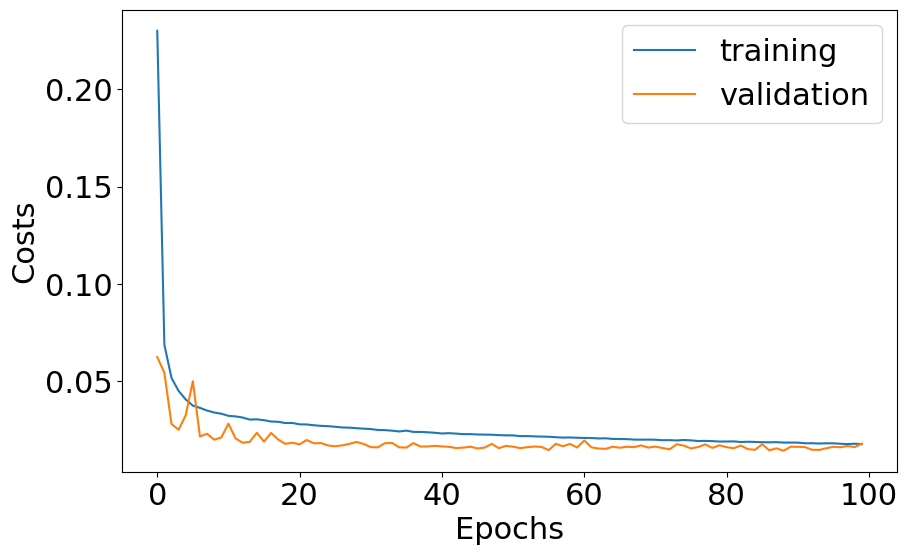

In [57]:
mpl.plot(result_2.history['loss'])
mpl.plot(result_2.history['val_loss'])
mpl.legend(['training', 'validation'])
mpl.xlabel('Epochs')
mpl.ylabel('Costs')